In [4]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

%matplotlib inline

In [5]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
submit = pd.read_csv('datasets/gender_submission.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data = train.append(test,sort=True)

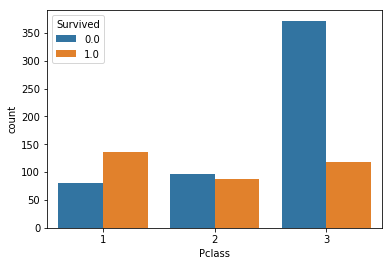

In [9]:
sns.countplot(data['Pclass'], hue=data['Survived'])

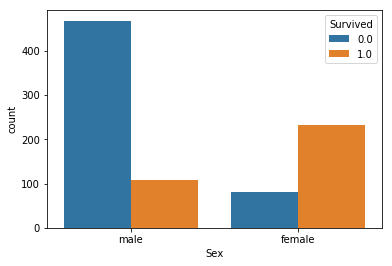

In [10]:
sns.countplot(data['Sex'], hue=data['Survived'])

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


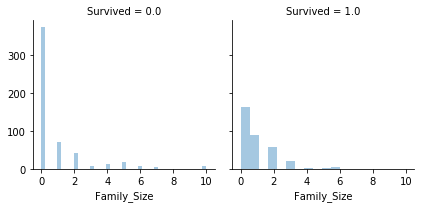

In [11]:
data['Family_Size'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [12]:
data['Title1'] = data['Name'].str.split(',' ,expand=True)[1]

In [13]:
data['Name'].str.split("," ,expand=True).head()

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [14]:
data['Title1'] = data['Title1'].str.split('.' ,expand=True)[0]

In [15]:
pd.crosstab(data['Title1'] ,data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [16]:
pd.crosstab(data['Title1'] ,data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [17]:
data.groupby(['Title1'])['Age'].mean()

Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [18]:
data['Title1'].head()


0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title1, dtype: object

In [19]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'],regex=True )

In [20]:
data['Title2'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Title2, dtype: object

In [21]:
data.groupby('Title2')['Age'].mean()

Title2
 Master     5.482642
 Miss      21.824366
 Mr        32.811056
 Mra       39.000000
 Mrs       36.959538
Name: Age, dtype: float64

In [22]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2   Pclass
 Master  1          6.984000
         2          2.757273
         3          6.090000
 Miss    1         30.131148
         2         20.865714
         3         17.360874
 Mr      1         42.241497
         2         32.914966
         3         28.318910
 Mra     1         39.000000
 Mrs     1         42.857143
         2         33.518519
         3         32.326531
Name: Age, dtype: float64

In [23]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mra,Mrs
Sex,,,,,
female,0,264,1,1,200
male,61,0,782,0,0


In [24]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [25]:
list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

[((' Master', 1), 6.984),
 ((' Master', 2), 2.7572727272727273),
 ((' Master', 3), 6.090000000000001)]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 203.6+ KB


In [27]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace('.','')
                        .replace('/','').strip().split(' ')[0] if not x.isdigit() else 'X')

In [28]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

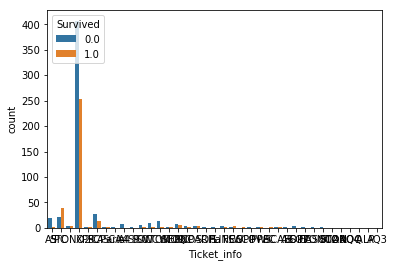

In [29]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

In [30]:
data['Embarked'] = data['Embarked'].fillna('S')

In [31]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X


In [32]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [33]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [34]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

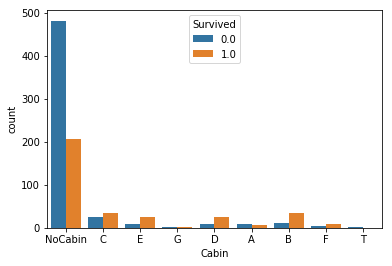

In [35]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [36]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [85]:
dataAgeNull = data[data['Age'].isna()]
dataAgeNotNull = data[data['Age'].notna()]
#將每一筆票價數據減其平均,若結果大於4倍平均差
#dataAgeNotNull['Fare'].mean()平均 36
#dataAgeNotNull['Fare'].std() 平均差 55.73
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull['Fare']-dataAgeNotNull['Fare'].mean())>
                    (4*dataAgeNotNull['Fare'].std())) | 
                    (np.abs(dataAgeNotNull['Family_Size']-data['Family_Size'].mean())>
                    (4*dataAgeNotNull['Family_Size'].std()))]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier['Age'])

#ageNullValues = rfModel_age.predict(dataAgeNull[ageColumns])
#dataAgeNull.loc[:,'Age'] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True,drop=True)

In [90]:
dataTrain = data[pd.notna(data['Survived'])].sort_values(by=['PassengerId'])
dataTest = data[~pd.notna(data['Survived'])].sort_values(by=['PassengerId'])

In [80]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [81]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [82]:
dataTrain.head()

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.0,2,7.2500,2,1,1,2,2,7
264,1.0,38.0,0,71.2833,0,0,1,4,14,2
265,1.0,26.0,2,7.9250,2,0,0,1,31,7
266,1.0,35.0,2,53.1000,0,0,1,4,36,2
267,0.0,35.0,2,8.0500,2,1,0,2,36,7


In [83]:
rf = RandomForestClassifier(criterion='gini',
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(dataTrain.iloc[ : ,1: ],dataTrain.iloc[ : ,0 ])
print("%.4f" % rf.oob_score_)

0.8294


In [84]:
pd.concat((pd.DataFrame(dataTrain.iloc[:,1:].columns ,columns = ['variable']),
           pd.DataFrame(rf.feature_importances_ ,columns = ['importance'])),
          axis=1).sort_values(by = 'importance' ,ascending = False)[:20]

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,Title2,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


In [93]:
rf_res = rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv' ,index=False)

ValueError: could not convert string to float: 'SOTON/O.Q. 3101262'

In [94]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
